In [ ]:
#-------------------------------------------------------------------------------
# Breakpoint detection in a time series according to Pettitt 1979
# R script by Pascal Haenggi, v20090819
#-------------------------------------------------------------------------------
# x = time series with 1. column: year and 2. column: value
# alpha = significance level for test, e.g. 0.05
pettitt <- function(x, alpha) {
  # rank and rank_cumsum
  xtmp <- cbind(x, rank(x[,2]))
  xtmp <- cbind(xtmp, cumsum(xtmp[,3]))
  xtmp <- cbind(xtmp, 1:nrow(xtmp))
  # Xk (test statistic)
  xtmp <- cbind(xtmp, 2 * xtmp[,4] - xtmp[,5] * (nrow(xtmp) + 1))
  colnames(xtmp) <- c("YYYY", "VALUE", "rank", "rank_cumsum", "k", "Xk")
  # breakpoint
  XE  <- max(abs(xtmp[,'Xk']))
  XEa <- xtmp[which(abs(xtmp[,'Xk'])==XE), 'YYYY']
  # p-value
  n    <- nrow(xtmp)
  pval <- exp( (-6 * (XE^2)) / (n^2 + n^3) )
  # significance level (global for all series with same n)
  Xksign <- sqrt( -1/6 * ((log(alpha, base = exp(1))) * (n^2 + n^3)) )
  significant <- XE > Xksign

  res <- list(Xk=xtmp,XEa=XEa,XE=XE,Xksign=Xksign,sig=significant,pval=pval)
  return(res)
}
#-------------------------------------------------------------------------------

In [9]:
#-------------------------------------------------------------------------------
# Example
cand <- c(rnorm(30,2,0.15),rnorm(10,3,0.15))
cand <- cbind(1941:1980,cand) 

res <- pettitt(cand, 0.05)

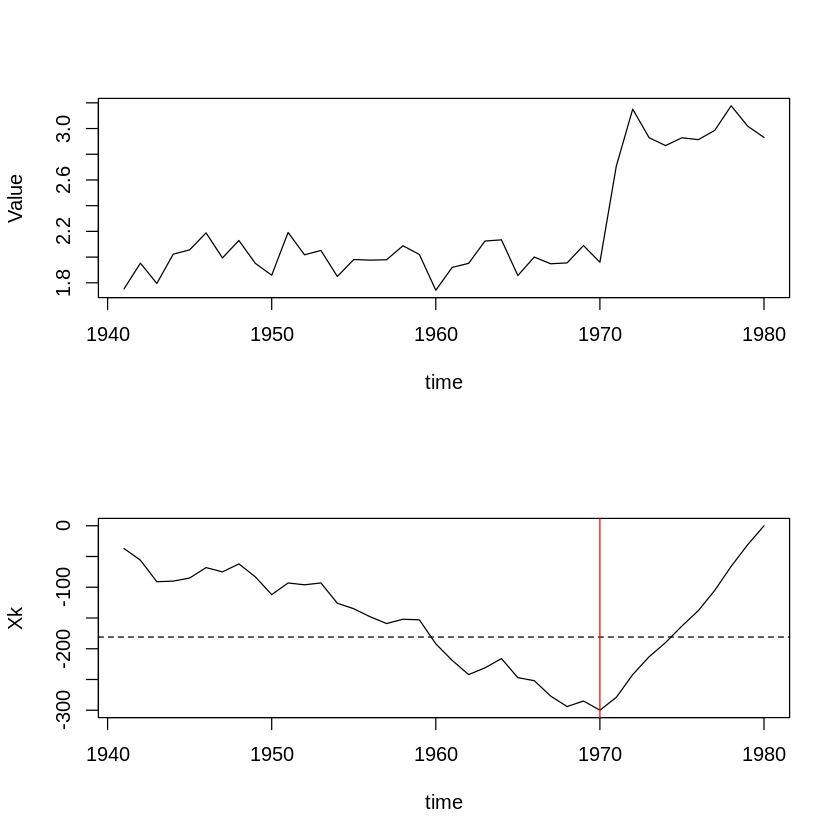

In [11]:
# Plot
par(mfrow = c(2,1))
plot(cand, type = "l", xlab="time", ylab="Value")
plot(res$Xk[,'YYYY'], res$Xk[,'Xk'], type = "l", xlab="time", ylab="Xk")
abline(h=res$Xksign, lty="dashed")
abline(h=-res$Xksign, lty="dashed")
abline(v=res$XEa, col="red")
#-------------------------------------------------------------------------------